In [1]:
from matplotlib import pyplot as plt
import pandas as pd

import sys, os
sys.path.insert(0, os.path.abspath('../scripts/'))

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.patheffects as path_effects
from scipy.spatial import ConvexHull
from scipy.spatial import Voronoi

#from shapely.ops import cascaded_union
#from shapely.geometry import Polygon, MultiPoint
from shapely import affinity
import math

%matplotlib inline
import Metrica_IO as mio
import Metrica_Viz as mviz
import Metrica_Velocities as mvel
import Metrica_PitchControl as mpc
import numpy as np
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import matplotlib.animation as animation

In [2]:
data = pd.read_csv(r'C:\Users\philipp.hollenhorst\OneDrive - ISR Information Products AG\FußballData\Data Analytics with Python\Last-Row-master\datasets\positional_data\liverpool_2019.csv')
data0 = pd.read_csv(r'C:\Users\philipp.hollenhorst\OneDrive - ISR Information Products AG\FußballData\Data Analytics with Python\Last-Row-master\datasets\positional_data\liverpool_2019_passes.csv')

data["t"] =0.05
data["time"] = data["t"]*data["frame"]
data["x"] = data["x"]*105/100
data["y"] = data["y"]*68/100

data0["t"] =0.05
data0["time_start"] = data0["t"]*data0["from_frame"]
data0["from_x"] = data0["from_x"]*105/100
data0["from_y"] = data0["from_y"]*68/100
data0["time_end"] = data0["t"]*data0["to_frame"]
data0["to_x"] = data0["to_x"]*105/100
data0["to_y"] = data0["to_y"]*68/100
data0


,Unnamed: 0,from_team,from_x,from_y,from_frame,from_player_num,to_team,to_x,to_y,to_frame,to_player_num,play,t,time_start,time_end
0,0,attack,48.714286,7.571429,0,10.0,attack,51.286368,18.490499,22.0,8.0,Liverpool [3] - 0 Bournemouth,0.05,0.0,1.1
1,1,attack,54.403845,19.455887,42,8.0,attack,89.843521,20.921598,108.0,9.0,Liverpool [3] - 0 Bournemouth,0.05,2.1,5.4
2,2,attack,89.843521,20.921598,108,9.0,attack,90.529988,22.600745,118.0,11.0,Liverpool [3] - 0 Bournemouth,0.05,5.4,5.9
3,0,attack,37.857143,46.428571,16,4.0,attack,87.103682,49.642437,78.0,10.0,Bayern 0 - [1] Liverpool,0.05,0.8,3.9
4,0,attack,49.800692,10.772590,14,26.0,attack,29.922819,4.849614,42.0,10.0,Fulham 0 - [1] Liverpool,0.05,0.7,2.1
5,1,attack,11.250965,16.058413,118,10.0,attack,0.711186,25.007844,154.0,9.0,Fulham 0 - [1] Liverpool,0.05,5.9,7.7
6,2,attack,0.711186,25.007844,154,9.0,attack,7.167413,30.549822,168.0,10.0,Fulham 0 - [1] Liverpool,0.05,7.7,8.4
7,0,defense,89.609193,29.160371,22,NaN,defense,82.306638,27.914281,48.0,NaN,Southampton 1 - [2] Liverpool,0.05,1.1,2.4
8,2,attack,83.600290,41.328752,72,14.0,attack,62.063710,34.185599,110.0,11.0,Southampton 1 - [2] Liverpool,0.05,3.6,5.5
9,0,attack,32.526904,16.599969,56,9.0,attack,30.642076,43.230920,90.0,14.0,Liverpool [2] - 0 Porto,0.05,2.8,4.5


In [3]:
data1 = data[data["play"]=="Bournemouth 0 - 3 Liverpool"]
A= data1["time"]


In [4]:
home = data1[data1["team"]=="attack"]
home["player"].value_counts()

away = data1[data1["team"]=="defense"]
away["player"].value_counts()

12087    171
12086    171
17899    171
17898    171
17897    171
17896    171
2879     171
2878     171
2877     171
6718     171
Name: player, dtype: int64

In [5]:
df = data1[data1["player"]==13][["x","y"]]
df = df.reset_index(drop=True)
df.columns=["Home_11_x","Home_11_y"]

df1 = data1[data1["player"]==19924][["x","y"]]
df1 = df1.reset_index(drop=True)
df1.columns=["Home_1_x","Home_1_y"]

df2 = data1[data1["player"]==19925][["x","y"]]
df2 = df2.reset_index(drop=True)
df2.columns=["Home_2_x","Home_2_y"]

df3 = data1[data1["player"]==20000][["x","y"]]
df3 = df3.reset_index(drop=True)
df3.columns=["Home_3_x","Home_3_y"]

df4 = data1[data1["player"]==14096][["x","y"]]
df4 = df4.reset_index(drop=True)
df4.columns=["Home_4_x","Home_4_y"]

df5 = data1[data1["player"]==14097][["x","y"]]
df5 = df5.reset_index(drop=True)
df5.columns=["Home_5_x","Home_5_y"]

df6 = data1[data1["player"]==1903][["x","y"]]
df6 = df6.reset_index(drop=True)
df6.columns=["Home_6_x","Home_6_y"]

df7 = data1[data1["player"]==1903][["x","y"]]
df7 = df7.reset_index(drop=True)
df7.columns=["Home_7_x","Home_7_y"]

df8 = data1[data1["player"]==1903][["x","y"]]
df8 = df8.reset_index(drop=True)
df8.columns=["Home_8_x","Home_8_y"]

df9 = data1[data1["player"]==1903][["x","y"]]
df9 = df9.reset_index(drop=True)
df9.columns=["Home_9_x","Home_9_y"]

df10 = data1[data1["player"]==1903][["x","y"]]
df10 = df10.reset_index(drop=True)
df10.columns=["Home_10_x","Home_10_y"]

df11 = np.arange(0,171)
df11 = pd.DataFrame(df11)
df11.columns=["frame"]


df12 = np.arange(0,171)
df12 = pd.DataFrame(df12)
df12.columns=["Period"]
df12["Period"] = 1

df13 = data1[data1["player"]==0][["x","y"]]
df13 = df13.reset_index(drop=True)
df13.columns=["ball_x","ball_y"]

df14 = data1[data1["player"]==12087][["x","y"]]
df14 = df14.reset_index(drop=True)
df14.columns=["Away_11_x","Away_11_y"]

df15 = data1[data1["player"]==12086][["x","y"]]
df15 = df15.reset_index(drop=True)
df15.columns=["Away_1_x","Away_1_y"]

df16 = data1[data1["player"]==17899][["x","y"]]
df16 = df16.reset_index(drop=True)
df16.columns=["Away_2_x","Away_2_y"]

df17 = data1[data1["player"]==17898][["x","y"]]
df17 = df17.reset_index(drop=True)
df17.columns=["Away_3_x","Away_3_y"]

df18 = data1[data1["player"]==17897][["x","y"]]
df18 = df18.reset_index(drop=True)
df18.columns=["Away_4_x","Away_4_y"]

df19 = data1[data1["player"]==17896][["x","y"]]
df19 = df19.reset_index(drop=True)
df19.columns=["Away_5_x","Away_5_y"]

df20 = data1[data1["player"]==2879][["x","y"]]
df20 = df20.reset_index(drop=True)
df20.columns=["Away_6_x","Away_6_y"]

df21 = data1[data1["player"]==2878][["x","y"]]
df21 = df21.reset_index(drop=True)
df21.columns=["Away_7_x","Away_7_y"]

df22 = data1[data1["player"]==2877][["x","y"]]
df22= df22.reset_index(drop=True)
df22.columns=["Away_8_x","Away_8_y"]

df23 = data1[data1["player"]==6718][["x","y"]]
df23 = df23.reset_index(drop=True)
df23.columns=["Away_9_x","Away_9_y"]

df24 = data1[data1["player"]==6718][["x","y"]]
df24 = df24.reset_index(drop=True)
df24.columns=["Away_10_x","Away_10_y"]

df25 = np.arange(0,171)
df25 = pd.DataFrame(df25)
df25.columns=["frame"]

df26 = np.arange(0,171)
df26 = pd.DataFrame(df26)
df26.columns=["Period"]
df26["Period"] = 1

df27 = data1[data1["player"]==0][["x","y"]]
df27 = df27.reset_index(drop=True)
df27.columns=["ball_x","ball_y"]

tracking_home = pd.concat([df11,df12],axis=1)
tracking_home["Time [s]"] = 0.05
tracking_home["Time [s]"] = 0.05*tracking_home["frame"]

tracking_home = pd.concat([tracking_home,df,df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df13],axis=1)
tracking_home = tracking_home.set_index("frame")

tracking_away = pd.concat([df25,df26],axis=1)
tracking_away["Time [s]"] = 0.05
tracking_away["Time [s]"] = 0.05*tracking_away["frame"]

tracking_away = pd.concat([tracking_away,df14,df15,df16,df17,df18,df19,df20,df21,df22,df23,df24,df27],axis=1)
tracking_away = tracking_away.set_index("frame")
tracking_away


,Period,Time [s],Away_11_x,Away_11_y,Away_1_x,Away_1_y,Away_2_x,Away_2_y,Away_3_x,Away_3_y,Away_4_x,Away_4_y,Away_5_x,Away_5_y,Away_6_x,Away_6_y,Away_7_x,Away_7_y,Away_8_x,Away_8_y,Away_9_x,Away_9_y,Away_10_x,Away_10_y,ball_x,ball_y
frame,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,0.00,53.714286,40.142857,41.285714,23.857143,42.722454,52.664663,43.428571,63.142857,39.142857,56.000000,50.142857,59.428571,30.571429,30.142857,31.302378,42.506222,34.991341,53.454464,6.441252,33.334687,6.441252,33.334687,34.991341,53.454464
1,1,0.05,53.658850,40.114351,41.631765,23.796387,42.840166,52.725221,43.592695,63.169074,39.165879,56.039116,50.289526,59.417265,30.635622,30.119887,31.279977,42.440169,35.118447,53.552696,6.455100,33.332976,6.455100,33.332976,36.186428,52.813230
2,1,0.10,53.601133,40.088600,41.967266,23.741979,42.942744,52.775264,43.743393,63.191239,39.178086,56.069838,50.423530,59.403113,30.693152,30.097413,31.249602,42.370925,35.222499,53.637557,6.466628,33.331593,6.466628,33.331593,37.309086,52.210858
3,1,0.15,53.541067,40.065506,42.292267,23.693763,43.030771,52.815144,43.881170,63.209506,39.179726,56.092365,50.545346,59.386222,30.744177,30.075433,31.211626,42.298678,35.304229,53.709335,6.475883,33.330522,6.475883,33.330522,38.359314,51.647349
4,1,0.20,53.478583,40.044974,42.606816,23.651585,43.104831,52.845214,44.006527,63.224025,39.171047,56.106902,50.655446,59.366699,30.788855,30.053947,31.166425,42.223611,35.364365,53.768318,6.482913,33.329747,6.482913,33.329747,39.337112,51.122703
5,1,0.25,53.413614,40.026908,42.910965,23.615292,43.165508,52.865827,44.119969,63.234948,39.152299,56.113649,50.754305,59.344651,30.827344,30.032952,31.114372,42.145912,35.403636,53.814792,6.487764,33.329251,6.487764,33.329251,40.242481,50.636920
6,1,0.30,53.346093,40.011211,43.204760,23.584728,43.213386,52.877336,44.221997,63.242427,39.123729,56.112808,50.842398,59.320184,30.859803,30.012447,31.055841,42.065766,35.422771,53.849045,6.490485,33.329018,6.490485,33.329018,41.075421,50.189999
7,1,0.35,53.275950,39.997787,43.488254,23.559739,43.249050,52.880094,44.313115,63.246614,39.085587,56.104581,50.920199,59.293404,30.886390,29.992430,30.991207,41.983358,35.422501,53.871365,6.491123,33.329033,6.491123,33.329033,41.835931,49.781941
8,1,0.40,53.203118,39.986540,43.761493,23.540171,43.273082,52.874453,44.393826,63.247661,39.038121,56.089170,50.988182,59.264419,30.907263,29.972899,30.920845,41.898874,35.403553,53.882041,6.489725,33.329278,6.489725,33.329278,42.524011,49.412745


In [6]:
def calc_player_velocities(team, window=7, polyorder=1, maxspeed = 12):
    """ calc_player_velocities( tracking_data )
    
    Calculate player velocities in x & y direciton, and total player speed at each timestamp of the tracking data
    
    Parameters
    -----------
        team: the tracking DataFrame for home or away team
        smoothing: boolean variable that determines whether velocity measures are smoothed. Default is True.
        filter: type of filter to use when smoothing the velocities. Default is Savitzky-Golay, which fits a polynomial of order 'polyorder' to the data within each window
        window: smoothing window size in # of frames
        polyorder: order of the polynomial for the Savitzky-Golay filter. Default is 1 - a linear fit to the velcoity, so gradient is the acceleration
        maxspeed: the maximum speed that a player can realisitically achieve (in meters/second). Speed measures that exceed maxspeed are tagged as outliers and set to NaN. 
        
    Returrns
    -----------
       team : the tracking DataFrame with columns for speed in the x & y direction and total speed added

    """
    
    
    # Get the player ids
    player_ids = np.unique( [ c[:-2] for c in team.columns if c[:4] in ['Home','Away'] ] )

    # Calculate the timestep from one frame to the next. Should always be 0.04 within the same half
    dt = team['Time [s]'].diff()
    
    
    
    # estimate velocities for players in team
    for player in player_ids: # cycle through players individually
        # difference player positions in timestep dt to get unsmoothed estimate of velicity
        vx = team[player+"_x"].diff() / dt
        vy = team[player+"_y"].diff() / dt

        if maxspeed>0:
            # remove unsmoothed data points that exceed the maximum speed (these are most likely position errors)
            raw_speed = np.sqrt( vx**2 + vy**2 )
            vx[ raw_speed>maxspeed ] = np.nan
            vy[ raw_speed>maxspeed ] = np.nan
             
                
        
        # put player speed in x,y direction, and total speed back in the data frame
        team[player + "_vx"] = vx
        team[player + "_vy"] = vy
        team[player + "_speed"] = np.sqrt( vx**2 + vy**2 )

    return team

In [7]:
tracking_home = calc_player_velocities(tracking_home)
tracking_away = calc_player_velocities(tracking_away)

In [8]:
data0 = data0.drop(columns=["from_team"])
data0 = data0[data0["play"]=="Bournemouth 0 - 3 Liverpool"]
data0
data0["time_start"]

40    4.1
Name: time_start, dtype: float64

In [9]:

data1 = data0.copy()
data1.columns=["Team","Type","Subtype","Period","Start Frame","Start Time [s]","End Frame","End Time [s]","From","To","Start X","Start Y","End X","End Y"]
data1["Team"] ="Home"
data1["Type"] = "Pass"
data1["Subtype"] = "-"
data1["Period"] = 1
data1["Start Frame"] = data0["from_frame"]
data1["Start Time [s]"] = data0["time_start"]
data1["End Frame"] = data0["to_frame"]
data1["End Time [s]"] =data0["time_end"]
data1["From"] = data0["from_player_num"]
data1["To"] = data0["to_player_num"]
data1["Start X"] = data0["from_x"]
data1["Start Y"] = data0["from_y"]
data1["End X"] = data0["to_x"]
data1["End Y"] = data0["to_y"]
data1

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
40,Home,Pass,-,1,82,4.1,126.0,6.3,8.0,11.0,32.753453,35.24471,9.042356,25.508438


In [10]:
events = data1
events["Start X"] = events["Start X"]-53
events["Start Y"] = events["Start Y"]-34
events["End X"] = events["End X"]-53
events["End Y"] = events["End Y"]-34
events = events.set_index([pd.Index([int(events["Start Frame"])])])
events

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
82,Home,Pass,-,1,82,4.1,126.0,6.3,8.0,11.0,-20.246547,1.24471,-43.957644,-8.491562


In [11]:
tracking_home
tracking_home["Home_11_x"] = tracking_home["Home_11_x"] -53
tracking_home["Home_1_x"] = tracking_home["Home_1_x"] -53
tracking_home["Home_2_x"] = tracking_home["Home_2_x"] -53
tracking_home["Home_3_x"] = tracking_home["Home_3_x"] -53
tracking_home["Home_4_x"] = tracking_home["Home_4_x"] -53
tracking_home["Home_5_x"] = tracking_home["Home_5_x"] -53
tracking_home["Home_6_x"] = tracking_home["Home_6_x"] -53
tracking_home["Home_7_x"] = tracking_home["Home_7_x"] -53
tracking_home["Home_8_x"] = tracking_home["Home_8_x"] -53
tracking_home["Home_9_x"] = tracking_home["Home_9_x"] -53
tracking_home["Home_10_x"] = tracking_home["Home_10_x"] -53

tracking_home["Home_11_y"] = tracking_home["Home_11_y"] -34
tracking_home["Home_1_y"] = tracking_home["Home_1_y"] -34
tracking_home["Home_2_y"] = tracking_home["Home_2_y"] -34
tracking_home["Home_3_y"] = tracking_home["Home_3_y"] -34
tracking_home["Home_4_y"] = tracking_home["Home_4_y"] -34
tracking_home["Home_5_y"] = tracking_home["Home_5_y"] -34
tracking_home["Home_6_y"] = tracking_home["Home_6_y"] -34
tracking_home["Home_7_y"] = tracking_home["Home_7_y"] -34
tracking_home["Home_8_y"] = tracking_home["Home_8_y"] -34
tracking_home["Home_9_y"] = tracking_home["Home_9_y"] -34
tracking_home["Home_10_y"] = tracking_home["Home_10_y"] -34

tracking_home["ball_x"] = tracking_home["ball_x"] -53
tracking_home["ball_y"] = tracking_home["ball_y"] -34

tracking_home

,Period,Time [s],Home_11_x,Home_11_y,Home_1_x,Home_1_y,Home_2_x,Home_2_y,Home_3_x,Home_3_y,Home_4_x,Home_4_y,Home_5_x,Home_5_y,Home_6_x,Home_6_y,Home_7_x,Home_7_y,Home_8_x,Home_8_y,Home_9_x,Home_9_y,Home_10_x,Home_10_y,ball_x,ball_y,Home_1_vx,Home_1_vy,Home_1_speed,Home_10_vx,Home_10_vy,Home_10_speed,Home_11_vx,Home_11_vy,Home_11_speed,Home_2_vx,Home_2_vy,Home_2_speed,Home_3_vx,Home_3_vy,Home_3_speed,Home_4_vx,Home_4_vy,Home_4_speed,Home_5_vx,Home_5_vy,Home_5_speed,Home_6_vx,Home_6_vy,Home_6_speed,Home_7_vx,Home_7_vy,Home_7_speed,Home_8_vx,Home_8_vy,Home_8_speed,Home_9_vx,Home_9_vy,Home_9_speed
frame,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,0.00,-18.906028,16.059633,1.428571,26.285714,-14.000000,23.428571,0.714286,4.142857,-14.642857,-24.757143,-20.571429,-4.571429,-7.294755,16.009520,-7.294755,16.009520,-7.294755,16.009520,-7.294755,16.009520,-7.294755,16.009520,-18.008659,19.454464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0.05,-18.662924,16.358492,1.381727,26.094916,-13.936808,23.524680,0.714286,4.142857,-14.575755,-24.718099,-20.532804,-4.543337,-7.346363,15.980273,-7.346363,15.980273,-7.346363,15.980273,-7.346363,15.980273,-7.346363,15.980273,-16.813572,18.813230,-0.936888,-3.815967,3.929296,-1.032160,-0.584939,1.186384,4.862073,5.977175,7.704958,1.263849,1.922173,2.300448,0.000000,0.00000,0.000000,1.342051,0.780878,1.552698,0.772489,0.561824,0.955189,-1.032160,-0.584939,1.186384,-1.032160,-0.584939,1.186384,-1.032160,-0.584939,1.186384,-1.032160,-0.584939,1.186384
2,1,0.10,-18.450054,16.620110,1.335248,25.910414,-13.883103,23.604777,0.714286,4.142857,-14.490816,-24.683195,-20.496378,-4.522770,-7.395596,15.930378,-7.395596,15.930378,-7.395596,15.930378,-7.395596,15.930378,-7.395596,15.930378,-15.690914,18.210858,-0.929587,-3.690036,3.805325,-0.984649,-0.997904,1.401908,4.257410,5.232350,6.745593,1.074095,1.601946,1.928708,0.000000,0.00000,0.000000,1.698771,0.698069,1.836607,0.728529,0.411352,0.836639,-0.984649,-0.997904,1.401908,-0.984649,-0.997904,1.401908,-0.984649,-0.997904,1.401908,-0.984649,-0.997904,1.401908
3,1,0.15,-18.266312,16.845832,1.289126,25.732083,-13.838693,23.669321,0.714286,4.142857,-14.389391,-24.651996,-20.462139,-4.509156,-7.442638,15.860638,-7.442638,15.860638,-7.442638,15.860638,-7.442638,15.860638,-7.442638,15.860638,-14.640686,17.647349,-0.922432,-3.566630,3.683983,-0.940844,-1.394790,1.682447,3.674828,4.514444,5.821045,0.888193,1.290868,1.566917,0.000000,0.00000,0.000000,2.028509,0.623982,2.122310,0.684778,0.272273,0.736922,-0.940844,-1.394790,1.682447,-0.940844,-1.394790,1.682447,-0.940844,-1.394790,1.682447,-0.940844,-1.394790,1.682447
4,1,0.20,-18.110596,17.037005,1.243355,25.559795,-13.803386,23.718768,0.714286,4.142857,-14.272827,-24.624066,-20.430077,-4.501927,-7.487675,15.771859,-7.487675,15.771859,-7.487675,15.771859,-7.487675,15.771859,-7.487675,15.771859,-13.662888,17.122703,-0.915424,-3.445751,3.565277,-0.900743,-1.775599,1.991003,3.114326,3.823457,4.931313,0.706142,0.988939,1.215169,0.000000,0.00000,0.000000,2.331264,0.558616,2.397257,0.641237,0.144586,0.657336,-0.900743,-1.775599,1.991003,-0.900743,-1.775599,1.991003,-0.900743,-1.775599,1.991003,-0.900743,-1.775599,1.991003
5,1,0.25,-17.981801,17.194974,1.197927,25.393425,-13.776989,23.753576,0.714286,4.142857,-14.142476,-24.598967,-20.400182,-4.500512,-7.530892,15.664842,-7.530892,15.664842,-7.530892,15.664842,-7.530892,15.664842,-7.530892,15.664842,-12.757519,16.636920,-0.908562,-3.327397,3.449211,-0.864348,-2.140331,2.308270,2.575905,3.159388,4.076398,0.527942,0.696158,0.873704,0.000000,0.00000,0.000000,2.607036,0.501973,2.654922,0.597906,0.028291,0.598575,-0.864348,-2.140331,2.308270,-0.864348,-2.140331,2.308270,-0.864348,-2.140331,2.308270,-0.864348,-2.140331,2.308270
6,1,0.30,-17.878822,17.321086,1.152834,25.232847,-13.759309,23.774202,0.714286,4.142857,-13.999684,-24.576264,-20.372442,-4.504343,-7.572475,15.54039

In [12]:
tracking_away
tracking_away["Away_11_x"] = tracking_away["Away_11_x"] -53
tracking_away["Away_1_x"] = tracking_away["Away_1_x"] -53
tracking_away["Away_2_x"] = tracking_away["Away_2_x"] -53
tracking_away["Away_3_x"] = tracking_away["Away_3_x"] -53
tracking_away["Away_4_x"] = tracking_away["Away_4_x"] -53
tracking_away["Away_5_x"] = tracking_away["Away_5_x"] -53
tracking_away["Away_6_x"] = tracking_away["Away_6_x"] -53
tracking_away["Away_7_x"] = tracking_away["Away_7_x"] -53
tracking_away["Away_8_x"] = tracking_away["Away_8_x"] -53
tracking_away["Away_9_x"] = tracking_away["Away_9_x"] -53
tracking_away["Away_10_x"] = tracking_away["Away_10_x"] -53

tracking_away["Away_11_y"] = tracking_away["Away_11_y"] -34
tracking_away["Away_1_y"] = tracking_away["Away_1_y"] -34
tracking_away["Away_2_y"] = tracking_away["Away_2_y"] -34
tracking_away["Away_3_y"] = tracking_away["Away_3_y"] -34
tracking_away["Away_4_y"] = tracking_away["Away_4_y"] -34
tracking_away["Away_5_y"] = tracking_away["Away_5_y"] -34
tracking_away["Away_6_y"] = tracking_away["Away_6_y"] -34
tracking_away["Away_7_y"] = tracking_away["Away_7_y"] -34
tracking_away["Away_8_y"] = tracking_away["Away_8_y"] -34
tracking_away["Away_9_y"] = tracking_away["Away_9_y"] -34
tracking_away["Away_10_y"] = tracking_away["Away_10_y"] -34

tracking_away["ball_x"] = tracking_away["ball_x"] -53
tracking_away["ball_y"] = tracking_away["ball_y"] -34
tracking_away

,Period,Time [s],Away_11_x,Away_11_y,Away_1_x,Away_1_y,Away_2_x,Away_2_y,Away_3_x,Away_3_y,Away_4_x,Away_4_y,Away_5_x,Away_5_y,Away_6_x,Away_6_y,Away_7_x,Away_7_y,Away_8_x,Away_8_y,Away_9_x,Away_9_y,Away_10_x,Away_10_y,ball_x,ball_y,Away_1_vx,Away_1_vy,Away_1_speed,Away_10_vx,Away_10_vy,Away_10_speed,Away_11_vx,Away_11_vy,Away_11_speed,Away_2_vx,Away_2_vy,Away_2_speed,Away_3_vx,Away_3_vy,Away_3_speed,Away_4_vx,Away_4_vy,Away_4_speed,Away_5_vx,Away_5_vy,Away_5_speed,Away_6_vx,Away_6_vy,Away_6_speed,Away_7_vx,Away_7_vy,Away_7_speed,Away_8_vx,Away_8_vy,Away_8_speed,Away_9_vx,Away_9_vy,Away_9_speed
frame,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,0.00,0.714286,6.142857,-11.714286,-10.142857,-10.277546,18.664663,-9.571429,29.142857,-13.857143,22.000000,-2.857143,25.428571,-22.428571,-3.857143,-21.697622,8.506222,-18.008659,19.454464,-46.558748,-0.665313,-46.558748,-0.665313,-18.008659,19.454464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0.05,0.658850,6.114351,-11.368235,-10.203613,-10.159834,18.725221,-9.407305,29.169074,-13.834121,22.039116,-2.710474,25.417265,-22.364378,-3.880113,-21.720023,8.440169,-17.881553,19.552696,-46.544900,-0.667024,-46.544900,-0.667024,-16.813572,18.813230,6.921015,-1.215110,7.026873,0.276967,-0.034219,0.279073,-1.108717,-0.570118,1.246711,2.354248,1.211168,2.647529,3.282463,0.524332,3.324077,0.460438,0.782329,0.907767,2.933372,-0.226132,2.942075,1.283868,-0.459407,1.363588,-0.448019,-1.321070,1.394973,2.542109,1.964645,3.212810,0.276967,-0.034219,0.279073
2,1,0.10,0.601133,6.088600,-11.032734,-10.258021,-10.057256,18.775264,-9.256607,29.191239,-13.821914,22.069838,-2.576470,25.403113,-22.306848,-3.902587,-21.750398,8.370925,-17.777501,19.637557,-46.533372,-0.668407,-46.533372,-0.668407,-15.690914,18.210858,6.710020,-1.088171,6.797683,0.230558,-0.027657,0.232211,-1.154341,-0.515032,1.264026,2.051554,1.000856,2.282670,3.013969,0.443313,3.046397,0.244132,0.614424,0.661149,2.680094,-0.283038,2.694998,1.150599,-0.449480,1.235277,-0.607508,-1.384869,1.512259,2.081058,1.697226,2.685401,0.230558,-0.027657,0.232211
3,1,0.15,0.541067,6.065506,-10.707733,-10.306237,-9.969229,18.815144,-9.118830,29.209506,-13.820274,22.092365,-2.454654,25.386222,-22.255823,-3.924567,-21.788374,8.298678,-17.695771,19.709335,-46.524117,-0.669478,-46.524117,-0.669478,-14.640686,17.647349,6.500013,-0.964318,6.571155,0.185099,-0.021419,0.186334,-1.201325,-0.461871,1.287054,1.760538,0.797600,1.932786,2.755532,0.365328,2.779644,0.032797,0.450557,0.451749,2.436303,-0.337813,2.459612,1.020495,-0.439586,1.111147,-0.759512,-1.444953,1.632406,1.634592,1.435558,2.175481,0.185099,-0.021419,0.186334
4,1,0.20,0.478583,6.044974,-10.393184,-10.348415,-9.895169,18.845214,-8.993473,29.224025,-13.828953,22.106902,-2.344554,25.366699,-22.211145,-3.946053,-21.833575,8.223611,-17.635635,19.768318,-46.517087,-0.670253,-46.517087,-0.670253,-13.662888,17.122703,6.290994,-0.843552,6.347297,0.140589,-0.015506,0.141442,-1.249669,-0.410636,1.315406,1.481202,0.601403,1.598638,2.507153,0.290379,2.523913,-0.173569,0.290727,0.338598,2.202000,-0.390456,2.236350,0.893558,-0.429726,0.991519,-0.904030,-1.501325,1.752497,1.202712,1.179643,1.684659,0.140589,-0.015506,0.141442
5,1,0.25,0.413614,6.026908,-10.089035,-10.384708,-9.834492,18.865827,-8.880031,29.234948,-13.847701,22.113649,-2.245695,25.344651,-22.172656,-3.967048,-21.885628,8.145912,-17.596364,19.814792,-46.512236,-0.670749,-46.512236,-0.670749,-12.757519,16.636920,6.082962,-0.725873,6.126118,0.097029,-0.009917,0.097534,-1.299372,-0.361325,1.348675,1.213544,0.412263,1.281659,2.268831,0.218464,2.279325,-0.374965,0.134934,0.398504,1.977185,-0.440967,2.025762,0.769785,-0.419898,0.876860,-1.041063,-1.553983,1.870475,0.785419,0.929480,1.216888,0.097029,-0.009917,0.097534
6,1,0.30,0.346093,6.011211,-9.795240,-10.415272,-9.786614,18.877336,-8.778003,29.242427,-13.876271,22.112808,-2.157602,25.320184,-22.140

In [13]:
mviz.plot_events( events.loc[40], color='k', indicators = ['Marker','Arrow'], annotate=True )

KeyError: 40

C:\Users\philipp.hollenhorst\OneDrive - ISR Information Products AG\FußballData\Data Analytics with Python\LaurieOnTracking-master1\Metrica_Viz.py:139: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
C:\Users\philipp.hollenhorst\OneDrive - ISR Information Products AG\FußballData\Data Analytics with Python\LaurieOnTracking-master1\Metrica_Viz.py:139: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
C:\Users\philipp.hollenhorst\OneDrive - ISR Information Products AG\FußballData\Data Analytics with Python\LaurieOnTracking-master1\Metrica_Viz.py:147: MatplotlibDeprecat

(<Figure size 864x576 with 1 Axes>, <AxesSubplot:>)

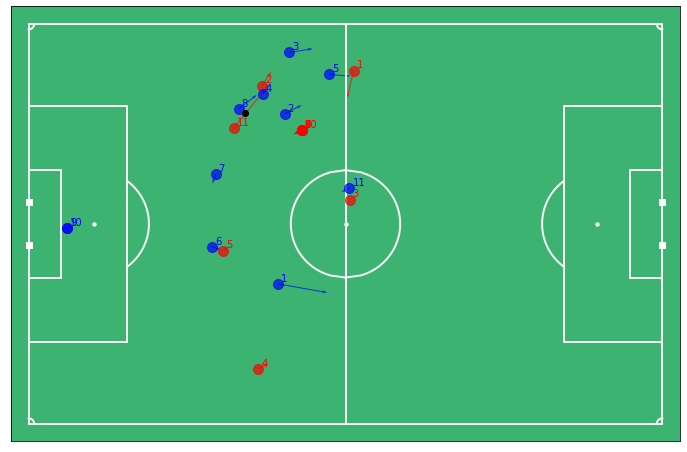

In [14]:
mviz.plot_frame( tracking_home.loc[1], tracking_away.loc[1], include_player_velocities=True, annotate=True)

Text(0, 8, 'Salah observes play and gets himself in a position in betwen the centre backs')

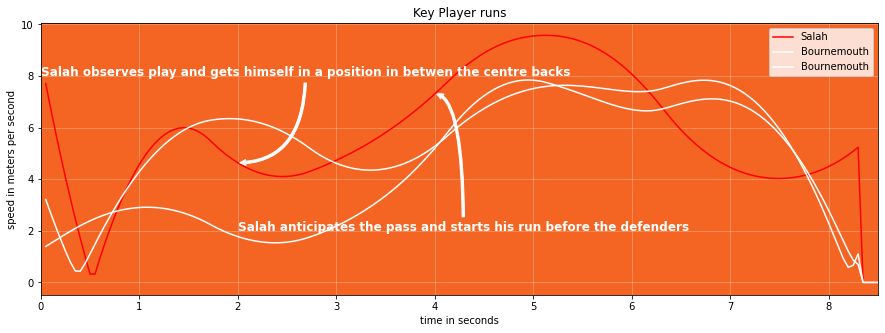

In [15]:
fix,ax = plt.subplots(figsize=(15,5))

ax.plot(tracking_home["Time [s]"],tracking_home["Home_11_speed"],label="Salah",color="red")  
ax.plot(tracking_home["Time [s]"],tracking_away["Away_7_speed"],label="Bournemouth",color="white")  
ax.plot(tracking_home["Time [s]"],tracking_away["Away_8_speed"],label="Bournemouth",color="white") 

ax.set_xlim(0,max(tracking_home["Time [s]"]))
#ax.set_xticks([0])
#ax.set_xticklabels([-50,-40,-30,-20,-10,0,10,20,30,40,50])
#ax.plot([52.5,52.5],[0,max(data2["time"])],color="k")
#ax.plot([-52.5,-52.5],[0,max(data2["time"])],color="k")
#ax.plot([36.5,36.5],[0,max(data2["time"])],color="k")
ax.legend()
ax.set_facecolor("#f46524")
ax.grid(linewidth=0.5,alpha=0.5,color="w")
ax.set_xlabel("time in seconds")
ax.set_ylabel("speed in meters per second")
ax.set_title("Key Player runs")
ax.annotate("Salah anticipates the pass and starts his run before the defenders",xy=(tracking_home["Time [s]"][80],tracking_home["Home_11_speed"][80]),
            xycoords="data",xytext=(2,2),color="w",fontsize=12, fontweight="bold",arrowprops=dict(facecolor="w",edgecolor="w",arrowstyle="simple",
                            connectionstyle=("angle3")))
ax.annotate("Salah observes play and gets himself in a position in betwen the centre backs",xy=(tracking_home["Time [s]"][40],tracking_home["Home_11_speed"][40]),
            xycoords="data",xytext=(0,8),color="w",fontsize=12, fontweight="bold",arrowprops=dict(facecolor="w",edgecolor="w",arrowstyle="simple",
                            connectionstyle=("angle3")))

In [16]:
# first get model parameters
params = mpc.default_model_params(3)



C:\Users\philipp.hollenhorst\OneDrive - ISR Information Products AG\FußballData\Data Analytics with Python\LaurieOnTracking-master1\Metrica_Viz.py:139: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
C:\Users\philipp.hollenhorst\OneDrive - ISR Information Products AG\FußballData\Data Analytics with Python\LaurieOnTracking-master1\Metrica_Viz.py:139: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
C:\Users\philipp.hollenhorst\OneDrive - ISR Information Products AG\FußballData\Data Analytics with Python\LaurieOnTracking-master1\Metrica_Viz.py:147: MatplotlibDeprecat

(<Figure size 864x576 with 1 Axes>, <AxesSubplot:>)

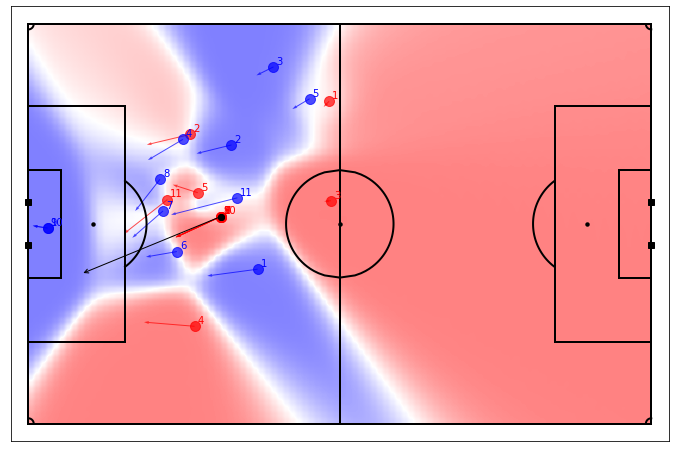

In [17]:
# evaluated pitch control surface for first pass
PPCF,xgrid,ygrid = mpc.generate_pitch_control_for_event(82, events, tracking_home, tracking_away, params, field_dimen = (106.,68.,), n_grid_cells_x = 100)
mviz.plot_pitchcontrol_for_event( 82, events,  tracking_home, tracking_away, PPCF, xgrid, ygrid, annotate=True )


In [18]:
pass_success_probability = []

for i,row in events.iterrows():
    pass_start_pos = np.array([row['Start X'],row['Start Y']])
    pass_target_pos = np.array([row['End X'],row['End Y']])
    pass_frame = row['Start Frame']
    
    attacking_players = mpc.initialise_players(tracking_home.loc[pass_frame],'Home',params)
    defending_players = mpc.initialise_players(tracking_away.loc[pass_frame],'Away',params)
    Patt,Pdef = mpc.calculate_pitch_control_at_target(pass_target_pos, attacking_players, defending_players, pass_start_pos, params)

    pass_success_probability.append( (i,Patt) )

In [19]:
pass_success_probability

[(82, 0.05061222237513485)]

In [20]:
# Need to make an adjustment to the Metrica_Viz.plot_pitch() function
# to provide the matplotlib figure and axes so that the pitch can be
# redrawn each time we record a frame for the output video.
def plot_pitch2(figax=None, field_dimen = (106.0,68.0), field_color ='green', linewidth=2,
                markersize=20):
    """ plot_pitch2
    
    Plots a soccer pitch. All distance units converted to meters.
    
    Parameters
    -----------
        fig,ax     : Can be used to pass in the (fig,ax) objects of a previously generated pitch. Set to (fig,ax) to use an existing figure, or None (the default) to generate a new pitch plot,
        field_dimen: (length, width) of field in meters. Default is (106,68)
        field_color: color of field. options are {'green','white'}
        linewidth  : width of lines. default = 2
        markersize : size of markers (e.g. penalty spot, centre spot, posts). default = 20
        
    Returrns
    -----------
       fig,ax : figure and aixs objects (so that other data can be plotted onto the pitch)
    """
    if figax is None:
      fig,ax = plt.subplots(figsize=(12,8)) # create a figure 
    else:
      fig, ax = figax
    # decide what color we want the field to be. Default is green, but can also choose white
    if field_color=='green':
        ax.set_facecolor('mediumseagreen')
        lc = 'whitesmoke' # line color
        pc = 'w' # 'spot' colors
    elif field_color=='white':
        lc = 'k'
        pc = 'k'
    # ALL DIMENSIONS IN m
    border_dimen = (3,3) # include a border arround of the field of width 3m
    meters_per_yard = 0.9144 # unit conversion from yards to meters
    half_pitch_length = field_dimen[0]/2. # length of half pitch
    half_pitch_width = field_dimen[1]/2. # width of half pitch
    signs = [-1,1] 
    # Soccer field dimensions typically defined in yards, so we need to convert to meters
    goal_line_width = 8*meters_per_yard
    box_width = 20*meters_per_yard
    box_length = 6*meters_per_yard
    area_width = 44*meters_per_yard
    area_length = 18*meters_per_yard
    penalty_spot = 12*meters_per_yard
    corner_radius = 1*meters_per_yard
    D_length = 8*meters_per_yard
    D_radius = 10*meters_per_yard
    D_pos = 12*meters_per_yard
    centre_circle_radius = 10*meters_per_yard
    # plot half way line # center circle
    ax.plot([0,0],[-half_pitch_width,half_pitch_width],lc,linewidth=linewidth)
    ax.scatter(0.0,0.0,marker='o',facecolor=lc,linewidth=0,s=markersize)
    y = np.linspace(-1,1,50)*centre_circle_radius
    x = np.sqrt(centre_circle_radius**2-y**2)
    ax.plot(x,y,lc,linewidth=linewidth)
    ax.plot(-x,y,lc,linewidth=linewidth)
    for s in signs: # plots each line seperately
        # plot pitch boundary
        ax.plot([-half_pitch_length,half_pitch_length],[s*half_pitch_width,s*half_pitch_width],lc,linewidth=linewidth)
        ax.plot([s*half_pitch_length,s*half_pitch_length],[-half_pitch_width,half_pitch_width],lc,linewidth=linewidth)
        # goal posts & line
        ax.plot( [s*half_pitch_length,s*half_pitch_length],[-goal_line_width/2.,goal_line_width/2.],pc+'s',markersize=6*markersize/20.,linewidth=linewidth)
        # 6 yard box
        ax.plot([s*half_pitch_length,s*half_pitch_length-s*box_length],[box_width/2.,box_width/2.],lc,linewidth=linewidth)
        ax.plot([s*half_pitch_length,s*half_pitch_length-s*box_length],[-box_width/2.,-box_width/2.],lc,linewidth=linewidth)
        ax.plot([s*half_pitch_length-s*box_length,s*half_pitch_length-s*box_length],[-box_width/2.,box_width/2.],lc,linewidth=linewidth)
        # penalty area
        ax.plot([s*half_pitch_length,s*half_pitch_length-s*area_length],[area_width/2.,area_width/2.],lc,linewidth=linewidth)
        ax.plot([s*half_pitch_length,s*half_pitch_length-s*area_length],[-area_width/2.,-area_width/2.],lc,linewidth=linewidth)
        ax.plot([s*half_pitch_length-s*area_length,s*half_pitch_length-s*area_length],[-area_width/2.,area_width/2.],lc,linewidth=linewidth)
        # penalty spot
        ax.scatter(s*half_pitch_length-s*penalty_spot,0.0,marker='o',facecolor=lc,linewidth=0,s=markersize)
        # corner flags
        y = np.linspace(0,1,50)*corner_radius
        x = np.sqrt(corner_radius**2-y**2)
        ax.plot(s*half_pitch_length-s*x,-half_pitch_width+y,lc,linewidth=linewidth)
        ax.plot(s*half_pitch_length-s*x,half_pitch_width-y,lc,linewidth=linewidth)
        # draw the D
        y = np.linspace(-1,1,50)*D_length # D_length is the chord of the circle that defines the D
        x = np.sqrt(D_radius**2-y**2)+D_pos
        ax.plot(s*half_pitch_length-s*x,y,lc,linewidth=linewidth)
        
    # remove axis labels and ticks
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xticks([])
    ax.set_yticks([])
    # set axis limits
    xmax = field_dimen[0]/2. + border_dimen[0]
    ymax = field_dimen[1]/2. + border_dimen[1]
    ax.set_xlim([-xmax,xmax])
    ax.set_ylim([-ymax,ymax])
    ax.set_axisbelow(True)
    return fig,ax

In [21]:
# Initialize the starting variables we need in this cell
params = mpc.default_model_params(3)

field_dimen = (106.0, 68.0)
n_grid_cells_x = 50
n_grid_cells_y = int(n_grid_cells_x * field_dimen[1] / field_dimen[0])

# Event ID of the last goal
event_id = events.index[0]
start_frame = 0
# To capture the goal frames I need to include the event after the goal,
# which is the post-goal celebration that takes several seconds. Since I
# don't want to track the celebration I found a frame id to cut it short.
end_frame = 171

home_team = tracking_home.loc[start_frame:end_frame]
away_team = tracking_away.loc[start_frame:end_frame]
attacking_team = events.loc[event_id].Team
frame_range = home_team.index

video_name = 'pitch_ctrlBournemouth 0 - 3 Liverpool.mp4'

In [22]:
%%capture
# Record the pitch control frames and output to a video file
plt.close('all')
fig, ax = mviz.plot_pitch(field_color='white', field_dimen=field_dimen)
ffmpeg_writer = animation.writers['ffmpeg']
writer = ffmpeg_writer(fps=25, metadata={'title': 'Tracking Data'})
writer.setup(fig=fig, outfile=video_name, dpi=100)
for frame_id in frame_range:
  plot_pitch2(figax=(fig, ax), field_color='white', field_dimen=field_dimen)
  xgrid = np.linspace(-field_dimen[0] / 2.0, field_dimen[0] / 2.0, n_grid_cells_x)
  ygrid = np.linspace(-field_dimen[1] / 2.0, field_dimen[1] / 2.0, n_grid_cells_y)
  ppcf_a = np.zeros(shape=(len(ygrid), len(xgrid)))
  ppcf_d = np.zeros(shape=(len(ygrid), len(xgrid)))
  if attacking_team == 'Home':
    attacking_players = mpc.initialise_players(home_team.loc[frame_id], 'Home', params)
    defending_players = mpc.initialise_players(away_team.loc[frame_id], 'Away', params)
  else:
    attacking_players = mpc.initialise_players(away_team.loc[frame_id], 'Away', params)
    defending_players = mpc.initialise_players(home_team.loc[frame_id], 'Home', params)
  for y in range(len(ygrid)):
    for x in range(len(xgrid)):
      target_pos = np.array([xgrid[x], ygrid[y]])
      ball_start_pos = np.array([home_team.loc[frame_id]['ball_x'],
                                 home_team.loc[frame_id]['ball_y']])
      ppcf_a[y, x], ppcf_d[y, x] = mpc.calculate_pitch_control_at_target(target_pos,
                                                                         attacking_players,
                                                                         defending_players,
                                                                         ball_start_pos,
                                                                         params)
  mviz.plot_frame(home_team.loc[frame_id],
                  away_team.loc[frame_id],
                  figax=(fig, ax),
                  include_player_velocities=True,
                  annotate=True)
  cmap = 'bwr' if attacking_team == 'Home' else 'bwr_r'
  ax.imshow(np.flipud(ppcf_a),
            extent=(np.amin(xgrid), np.amax(xgrid), np.amin(ygrid), np.amax(ygrid)),
            interpolation='hanning',
            vmin=0.0,
            vmax=1.0,
            cmap=cmap,
            alpha=0.5)
  # Overlay text of the control percentage
#  ax.text(3, -28,
#          "Attacking team control: {:.1f}%".format(ppcf_a.mean() * 100),
#          fontsize=16)
  writer.grab_frame()
  plt.cla()
writer.finish()

RuntimeError: Requested MovieWriter (ffmpeg) not available

In [23]:
from ipywidgets import Video
Video.from_file(video_name)

Video(value=b'\x00\x00\x00 ftypisom\x00\x00\x02\x00isomiso2avc1mp41\x00\x00\x00\x08free\x00\x07y\xadmdat\x00\x…